In [1]:
library(qvalue)
library(UpSetR)

In [2]:
results_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"

In [24]:
file = paste0(results_dir, "all_ct_loci.list.withCate.qvalue")
df = read.csv(file, sep="\t")
head(df)

,celltype,gene,R1,R2,R3,R4,R5,R6,pval_beta,pval_nominal,⋯,R3_Loci,R4_Loci,R5_Loci,R6_Loci,R1_topPval,R2_topPval,R3_topPval,R4_topPval,R5_topPval,R6_topPval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B_IN,A1BG,0.00170947,0.3706712,0.7981946,1.0000000,1.0000000,1.0000000,0.0040709,6.147731e-06,⋯,19:57957633:T:A,19:57863937:T:C,19:58872853:G:C,19:58733610:G:T,1.13564e-05,0.00402990,0.00845249,0.00692103,0.0119666,0.0103745
2,B_IN,A1BG.AS1,0.86506417,0.7648255,0.7769261,0.8074401,0.8690257,0.8953325,0.1423371,4.116421e-04,⋯,19:58824721:C:T,19:57859145:G:T,19:57945146:T:A,19:58748944:G:A,5.88327e-03,0.00940976,0.02022780,0.06795570,0.3637510,0.0601790


In [58]:
length(unique(df$gene))
length(unique(df[df$qval<0.05,"gene"]))

[1] 16250

[1] 4537

In [10]:
celltypes = c("B_IN","B_Mem","CD4_NC", "CD4_ET", "CD4_SOX4", "CD8_NC", "CD8_ET",
              "CD8_S100B", "DC", "Mono_C", "Mono_NC", "NK_R", "NK", "Plasma")

In [16]:
listInput <- list()
for (celltype in celltypes){
    df_curr = df[df$celltype == celltype,]
    genes = df_curr[df_curr$qval<0.05,"gene"]
    listInput[[celltype]] <- genes
}

In [18]:
length(listInput)

[1] 14

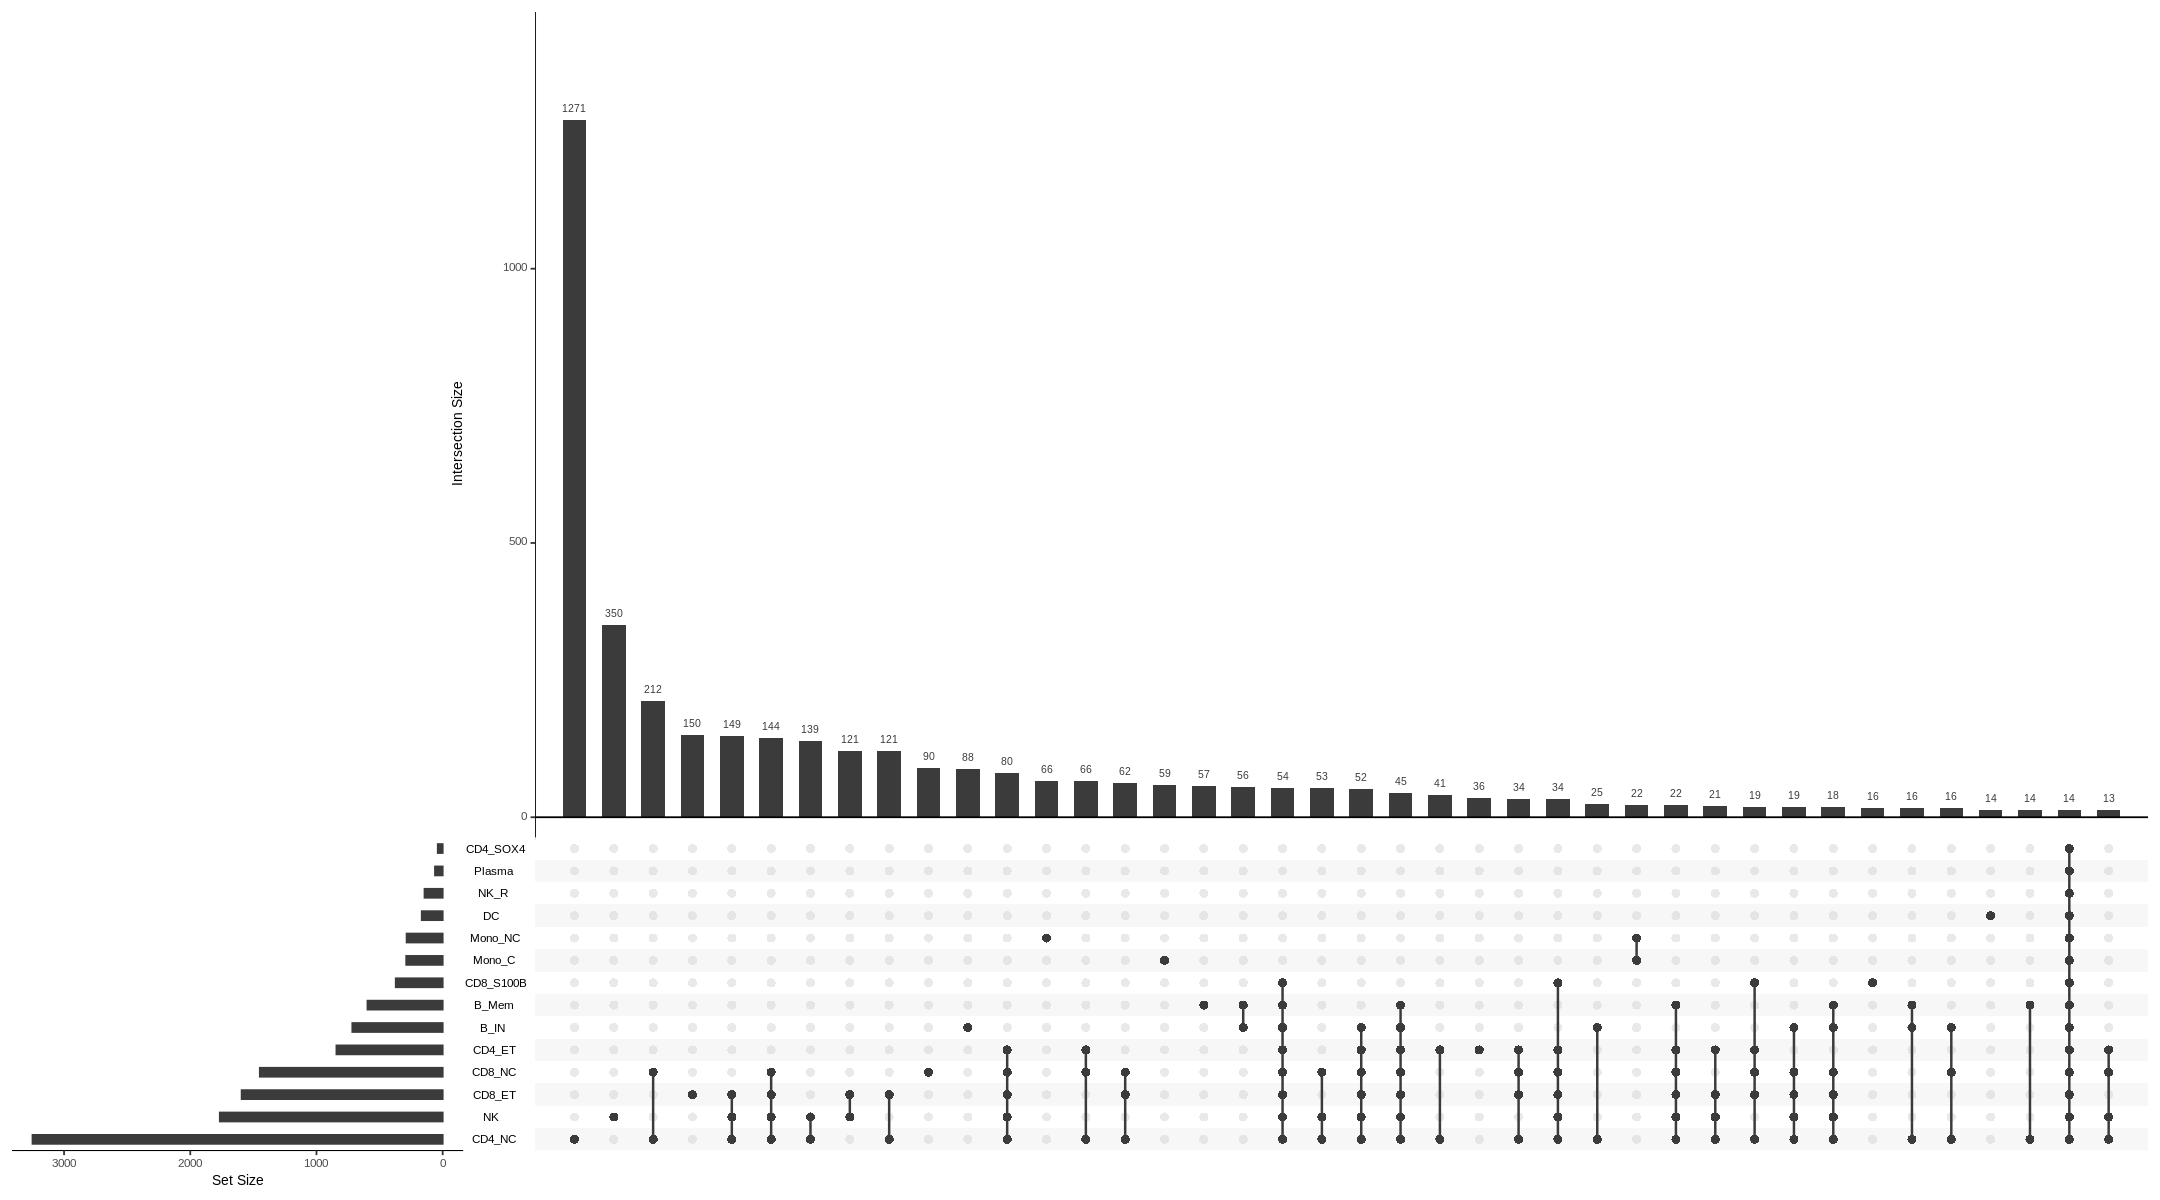

In [19]:
options(repr.plot.width = 18, repr.plot.height = 10) 
upset(fromList(listInput), nsets = 14, order.by = "freq")

In [21]:
df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))

In [22]:
df_colours

colours,celltype
<chr>,<chr>
#882E72,CD4_NC
#B178A6,CD4_ET
#D6C1DE,CD4_SOX4
#1965B0,CD8_ET
#5289C7,CD8_NC
#7BAFDE,CD8_S100B
#4EB265,NK
#90C987,NK_R
#CAE0AB,Plasma


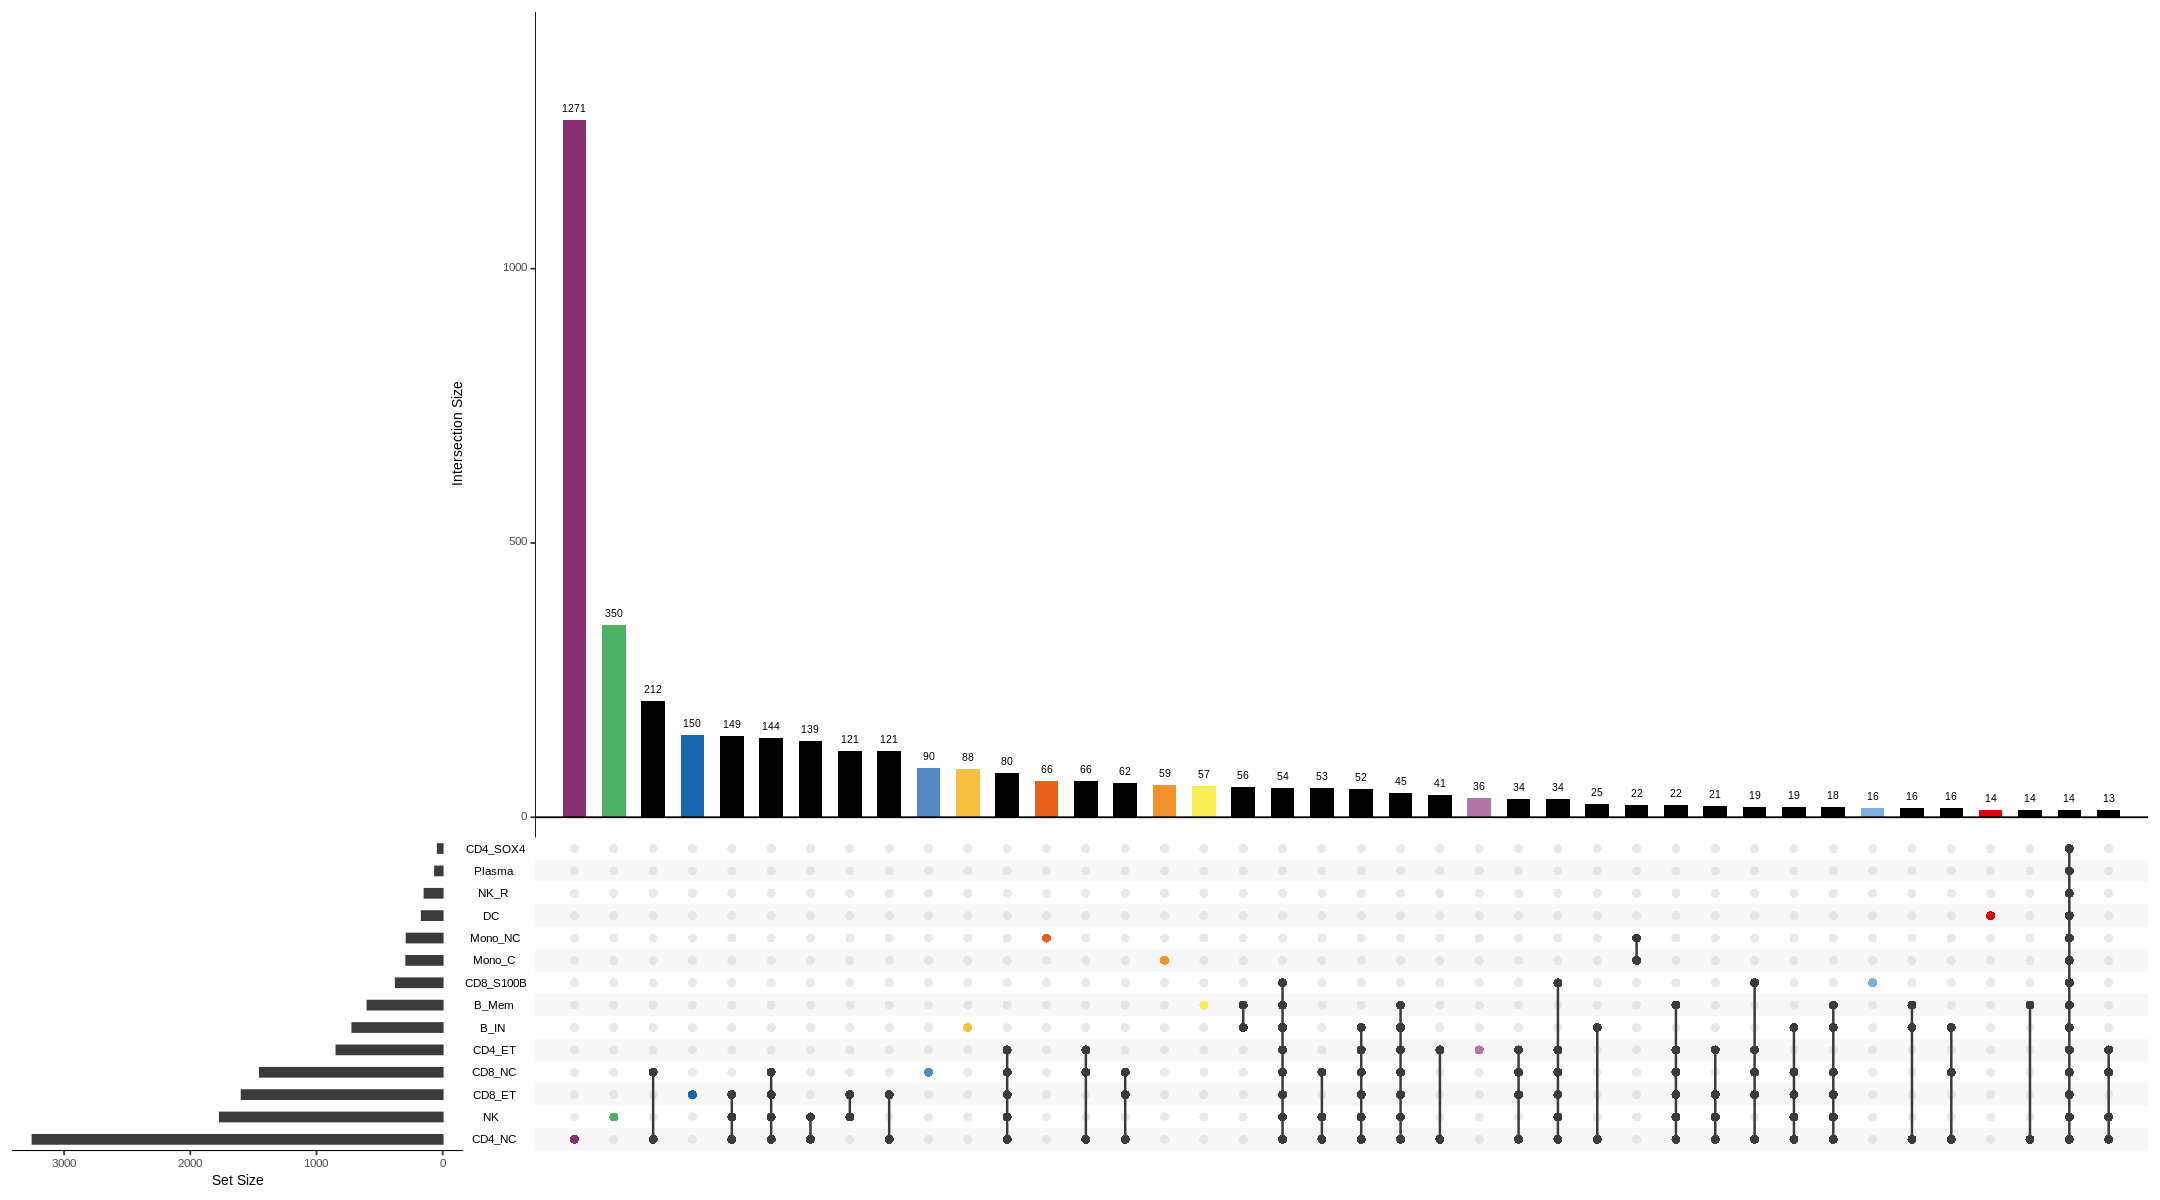

In [53]:
upset(fromList(listInput), nsets = 14, order.by = "freq", main.bar.color = "black", 
      queries = list(list(query = intersects, params = list(celltypes[1]), color=df_colours[df_colours$celltype==celltypes[1],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[2]), color=df_colours[df_colours$celltype==celltypes[2],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[3]), color=df_colours[df_colours$celltype==celltypes[3],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[4]), color=df_colours[df_colours$celltype==celltypes[4],"colours"], active = T),
#                      list(query = intersects, params = list(celltypes[5]), color=df_colours[df_colours$celltype==celltypes[5],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[6]), color=df_colours[df_colours$celltype==celltypes[6],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[7]), color=df_colours[df_colours$celltype==celltypes[7],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[8]), color=df_colours[df_colours$celltype==celltypes[8],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[9]), color=df_colours[df_colours$celltype==celltypes[9],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[10]), color=df_colours[df_colours$celltype==celltypes[10],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[11]), color=df_colours[df_colours$celltype==celltypes[11],"colours"], active = T),
#                      list(query = intersects, params = list(celltypes[12]), color=df_colours[df_colours$celltype==celltypes[12],"colours"], active = T),
                     list(query = intersects, params = list(celltypes[13]), color=df_colours[df_colours$celltype==celltypes[13],"colours"], active = T)#,
#                      list(query = intersects, params = list(celltypes[14]), color=df_colours[df_colours$celltype==celltypes[14],"colours"], active = T)
                    ))

In [38]:
df1 = fromList(listInput)
head(df1)

,B_IN,B_Mem,CD4_NC,CD4_ET,CD4_SOX4,CD8_NC,CD8_ET,CD8_S100B,DC,Mono_C,Mono_NC,NK_R,NK,Plasma
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,1,1,0,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,1,1,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,1,0,0,0,0,0,0,0
6,1,0,1,0,0,1,1,0,0,0,0,0,1,0


In [39]:
nrow(df1)

[1] 4537

In [43]:
nrow(df1[rowSums(df1)==0,])

[1] 0

In [59]:
nrow(df1[rowSums(df1)==1,])
nrow(df1[rowSums(df1)==1,])/nrow(df1)

[1] 2213

[1] 0.4877672

In [44]:
nrow(df1[rowSums(df1)>1,])

[1] 2324